In [23]:
import pyautogui
import threading
import sched, time
import matplotlib.pyplot as plt

import pyautogui, sys
import threading
from scipy import signal
print('Press Ctrl-C to quit.')


def record():
    x, y = pyautogui.position()
    return x,y

sampling_period = 0.001
fs = 1 / sampling_period
nyq = fs/2
fc = 0.5
Wn = fc/nyq
b, a = signal.butter(4, Wn, 'low')
width, height= pyautogui.size()

starttime = time.time()
nb_iter = 0
x_array = []
y_array = []      
x , y = record()
for i in range(19):
    x_array.append(x)
    y_array.append(y)
nb_iter = 0
while nb_iter < 30000:
    time.sleep(sampling_period - ((time.time() - starttime) % sampling_period))

    #x_array.pop(0)
    #y_array.pop(0)

    x , y = record()
    y = height - y

    x_array.append(x)
    y_array.append(y)
    nb_iter += 1


filtered_x= signal.filtfilt(b,a, x_array)
filtered_y = signal.filtfilt(b,a, y_array)
pos = [] 
for i in range(0,len(x_array)-1):
    pos.append((x_array[i],y_array[i]))



    
    #pyautogui.moveTo(filtered_x, filtered_y) 
    #print(f'moved to {filtered_x} and {filtered_y}')


Press Ctrl-C to quit.


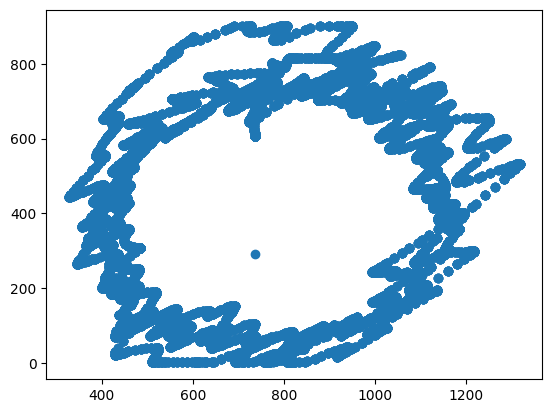

In [24]:
plt.scatter(x_array,y_array)
plt.show()


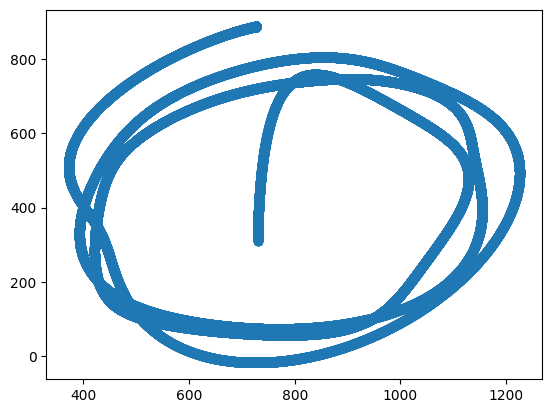

In [25]:
plt.scatter(filtered_x,filtered_y)
plt.show()